In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as npy

In [2]:
#pip install --upgrade nbconvert

In [3]:
# Load the Excel files into DataFrames
df_np = pd.read_excel('NP_data.xlsx')
df_fp = pd.read_excel('FP_data.xlsx')

# Display the first few rows of each DataFrame
print(df_np.head())
print(df_fp.head())

               Organization NP or FP  Year       Type  \
0  Texas Childrens Hospital       NP  2020  Specialty   
1  Texas Childrens Hospital       NP  2021  Specialty   
2  Texas Childrens Hospital       NP  2022  Specialty   
3  Texas Childrens Hospital       NP  2020  Specialty   
4  Texas Childrens Hospital       NP  2021  Specialty   

   Contributions and Grants  Program Service Revenue  Investment Income  \
0                  68143860               2650840461           18234222   
1                  90377913               2981690830           38629226   
2                  99755472               3686740831           21579451   
3                   4073762                271864755            5438451   
4                   3317126                312266654            5618720   

   Other Revenue  Total Revenue  Salaries & Benefits  ...  Net Assets  \
0       14668103     2751886646           1242700342  ...  5306106864   
1       27497662     3138195631           1413915021  ...  4

In [4]:
#Seperate numeric and non-numeric columns
numeric_np = df_np.select_dtypes(include=['float64','int64']).columns
non_numeric_np = df_np.select_dtypes(exclude=['float64','int64']).columns

numeric_fp = df_fp.select_dtypes(include=['float64','int64']).columns
non_numeric_fp = df_fp.select_dtypes(exclude=['float64','int64']).columns

print("Non-Profit Numeric Columns:", numeric_np)
print("For-Profit Numeric Columns:", non_numeric_np)
print("Non-Profit Non-Numeric Columns:", numeric_fp)
print("For-Profit Non-Numeric Columns:", non_numeric_fp)

Non-Profit Numeric Columns: Index(['Year', 'Contributions and Grants', 'Program Service Revenue',
       'Investment Income', 'Other Revenue', 'Total Revenue',
       'Salaries & Benefits', 'Other Expenses', 'Total Expenses',
       'Revenue less Expenses', 'Total Assets', 'Total Liabilities',
       'Net Assets', 'Program Efficiency Ratio',
       'Fundraising Efficiency Ratio', 'Operating Reserve Ratio',
       'Program Revenue Ratio', 'Revenue Composition Ratio',
       'Operating Margin', 'Debt to Asset Ratio', 'Current Ratio',
       'Contributions Dependency Ratio'],
      dtype='object')
For-Profit Numeric Columns: Index(['Organization', 'NP or FP', 'Type'], dtype='object')
Non-Profit Non-Numeric Columns: Index(['Year', 'Operating Margin', 'Net Profit Margin', 'Current Ratio',
       'Debt-to-Equity Ratio', 'Asset Turnover',
       'Interest Expense to Revenue'],
      dtype='object')
For-Profit Non-Numeric Columns: Index(['Organization', 'NP or FP', 'Type'], dtype='object')


In [5]:
# Function to process numeric columns with checks
def process_numeric_columns(df, numeric_columns):
    for column in numeric_columns:
        # Convert column to string, replace commas, and convert back to float
        df[column] = pd.to_numeric(df[column].astype(str).str.replace(',', ''), errors='coerce')
    return df

df_non_profit = process_numeric_columns(df_np, numeric_np)
df_for_profit = process_numeric_columns(df_fp, numeric_fp)

# Drop rows with NaN values in numeric columns to handle non-numeric data
df_non_profit = df_non_profit.dropna(subset=numeric_np)
df_for_profit = df_for_profit.dropna(subset=numeric_fp)

In [6]:
# Calculate the correlation matrices NP and FP
corr_non_profit = df_non_profit[numeric_np].corr()
corr_for_profit = df_for_profit[numeric_fp].corr()

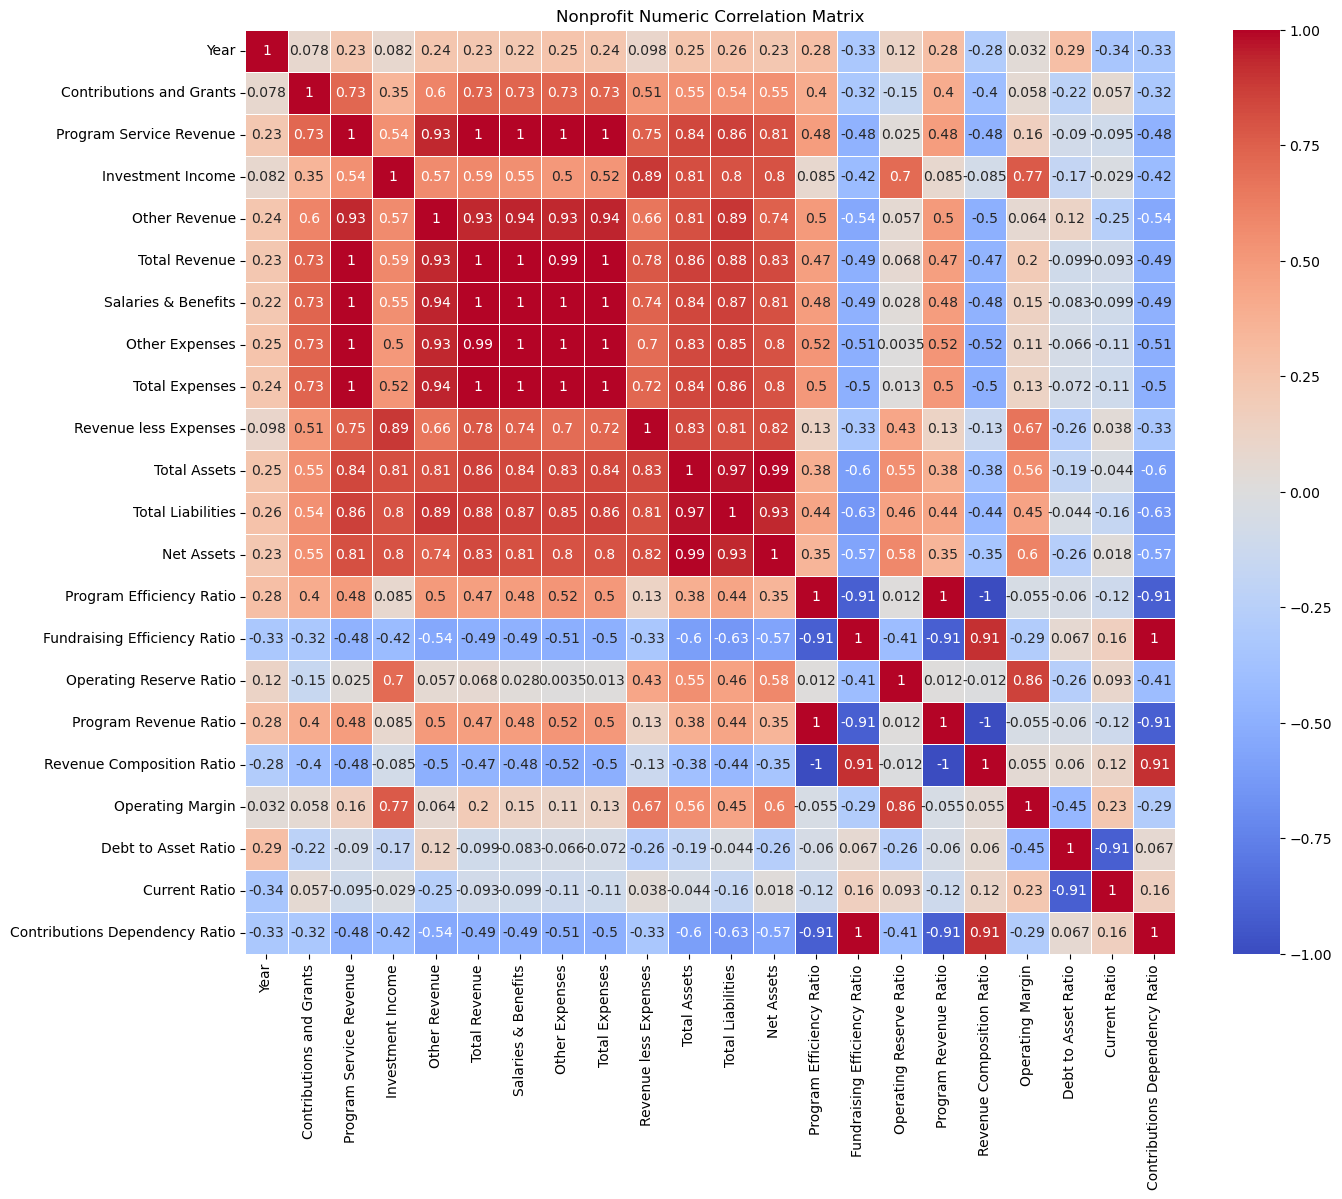

In [7]:
#NP heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_non_profit, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Nonprofit Numeric Correlation Matrix')
plt.show()

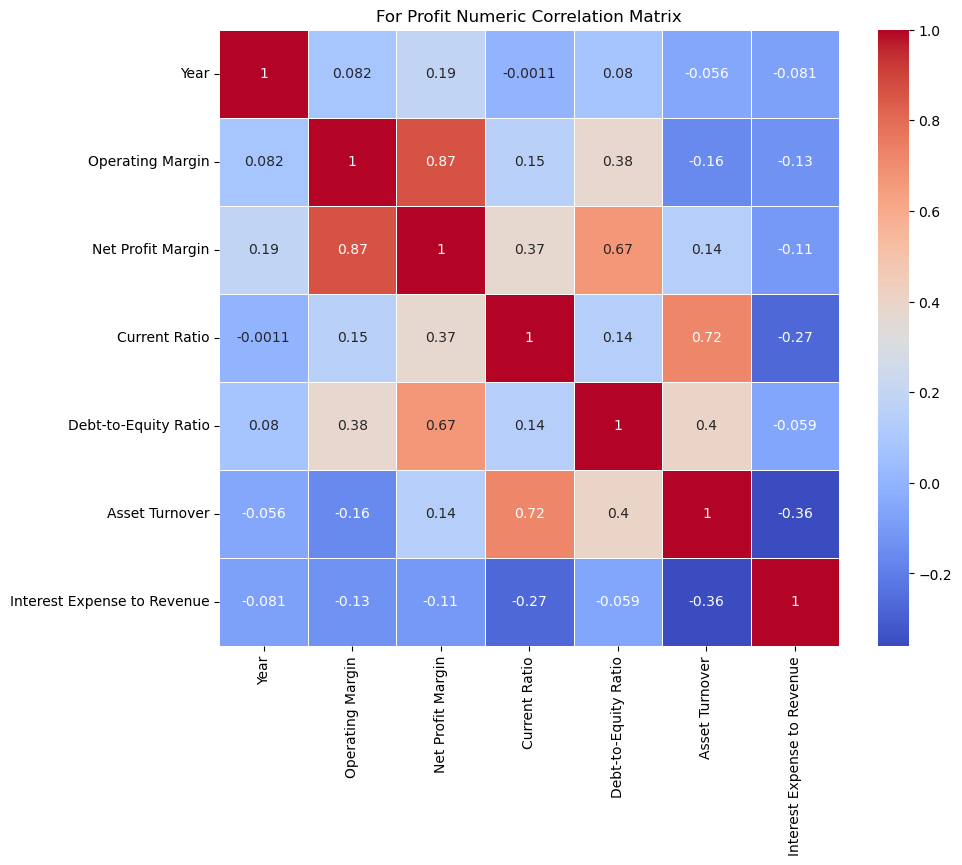

In [8]:
#FP heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_for_profit, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('For Profit Numeric Correlation Matrix')
plt.show()

# Initial notes
Notable NP high correlations
    
    * Operating Reserve Ratio and Investment Income
    
    * Operating Margin and Investment Income
    
    * Contributions Dependency Ratio and Revenue Composition Ratio
    
    * Fundraising Efficiency Ratio and Program Efficiency Ratio (Obvious)

Notable FP high correlations (not really important but we are writing them down anyways)
    
    * Debt to Equity Ratio and Net Profit Margin (obvious)
    
    * Nothing else really

# Comparisons of numeric vs non-numeric
# NP

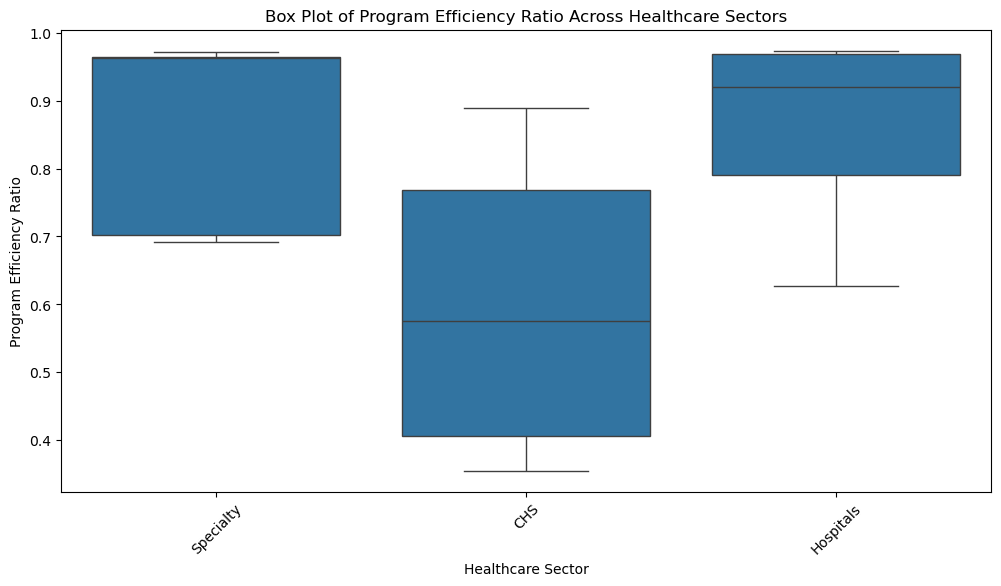

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Program Efficiency Ratio', data=df_np)
plt.title('Box Plot of Program Efficiency Ratio Across Healthcare Sectors')
plt.xlabel('Healthcare Sector')
plt.ylabel('Program Efficiency Ratio')
plt.xticks(rotation=45)
plt.show()

### Specialty Healthcare Facilities and Hospitals tend to have higher Program efficiency ratios

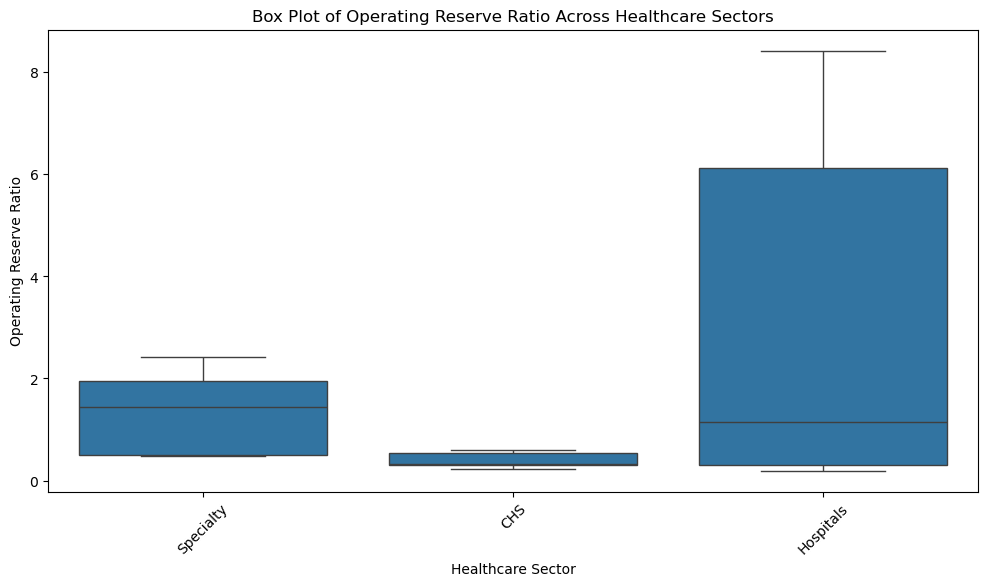

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Operating Reserve Ratio', data=df_np)
plt.title('Box Plot of Operating Reserve Ratio Across Healthcare Sectors')
plt.xlabel('Healthcare Sector')
plt.ylabel('Operating Reserve Ratio')
plt.xticks(rotation=45)
plt.show()

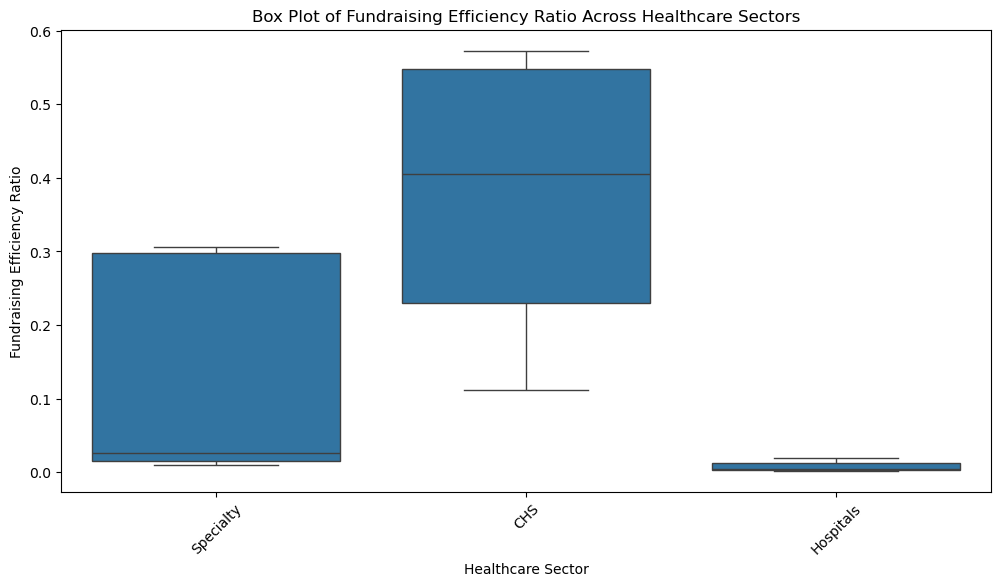

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Fundraising Efficiency Ratio', data=df_np)
plt.title('Box Plot of Fundraising Efficiency Ratio Across Healthcare Sectors')
plt.xlabel('Healthcare Sector')
plt.ylabel('Fundraising Efficiency Ratio')
plt.xticks(rotation=45)
plt.show()

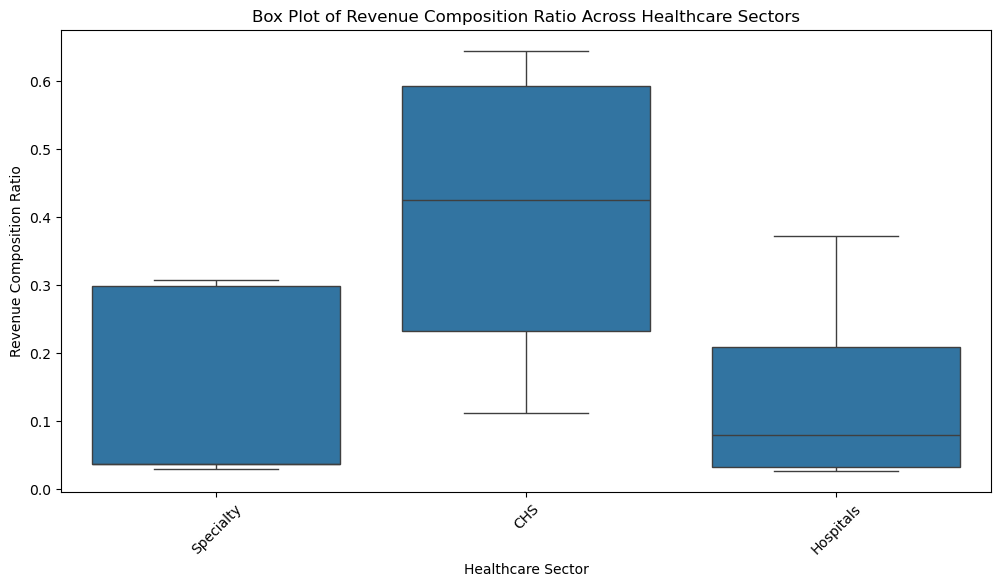

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Revenue Composition Ratio', data=df_np)
plt.title('Box Plot of Revenue Composition Ratio Across Healthcare Sectors')
plt.xlabel('Healthcare Sector')
plt.ylabel('Revenue Composition Ratio')
plt.xticks(rotation=45)
plt.show()

# NP Hypothesis Testing

In [17]:
from scipy.stats import pearsonr

# Example of hypothesis testing for Non-Profit organizations
corr_non_profit_1_2, p_value_non_profit_1_2 = pearsonr(df_non_profit['Operating Reserve Ratio'].astype(float), df_non_profit['Investment Income'].astype(float))

print(f"Non-Profit: Correlation between Operating Reserve Ratio and Investment Income: {corr_non_profit_1_2}, p-value: {p_value_non_profit_1_2}")

# Interpretation of p-values for Non-Profit
significance_level = 0.05
if p_value_non_profit_1_2 < significance_level:
    print("The correlation between Operating Reserve Ratio and Investment Income for Non-Profit organizations is statistically significant.")
else:
    print("The correlation between Operating Reserve Ratio and Investment Income for Non-Profit organizations is not statistically significant.")

Non-Profit: Correlation between Operating Reserve Ratio and Investment Income: 0.7049822862982116, p-value: 2.8049444091524495e-05
The correlation between Operating Reserve Ratio and Investment Income for Non-Profit organizations is statistically significant.


In [18]:
corr_non_profit_1_2, p_value_non_profit_1_2 = pearsonr(df_non_profit['Operating Margin'].astype(float), df_non_profit['Investment Income'].astype(float))

print(f"Non-Profit: Correlation between Operating Reserve Ratio and Investment Income: {corr_non_profit_1_2}, p-value: {p_value_non_profit_1_2}")

if p_value_non_profit_1_2 < significance_level:
    print("The correlation between Operating Margin and Investment Income for Non-Profit organizations is statistically significant.")
else:
    print("The correlation between Operating Margin and Investment Income for Non-Profit organizations is not statistically significant.")

Non-Profit: Correlation between Operating Reserve Ratio and Investment Income: 0.7700493551675203, p-value: 1.654698304929565e-06
The correlation between Operating Margin and Investment Income for Non-Profit organizations is statistically significant.


In [19]:
corr_non_profit_1_2, p_value_non_profit_1_2 = pearsonr(df_non_profit['Contributions Dependency Ratio'].astype(float), df_non_profit['Investment Income'].astype(float))

print(f"Non-Profit: Correlation between Operating Reserve Ratio and Investment Income: {corr_non_profit_1_2}, p-value: {p_value_non_profit_1_2}")

if p_value_non_profit_1_2 < significance_level:
    print("The correlation between Contributions Dependency Ratio and Investment Income for Non-Profit organizations is statistically significant.")
else:
    print("The correlation between Contributions Dependency Ratio and Investment Income for Non-Profit organizations is not statistically significant.")

Non-Profit: Correlation between Operating Reserve Ratio and Investment Income: -0.4152328695080545, p-value: 0.027997391465613135
The correlation between Contributions Dependency Ratio and Investment Income for Non-Profit organizations is statistically significant.


In [20]:
corr_non_profit_1_2, p_value_non_profit_1_2 = pearsonr(df_non_profit['Revenue Composition Ratio'].astype(float), df_non_profit['Investment Income'].astype(float))

print(f"Non-Profit: Correlation between Operating Reserve Ratio and Investment Income: {corr_non_profit_1_2}, p-value: {p_value_non_profit_1_2}")

if p_value_non_profit_1_2 < significance_level:
    print("The correlation between Revenue Composition Ratio and Investment Income for Non-Profit organizations is statistically significant.")
else:
    print("The correlation between Revenue Composition Ratio and Investment Income for Non-Profit organizations is not statistically significant.")

Non-Profit: Correlation between Operating Reserve Ratio and Investment Income: -0.08495545017302311, p-value: 0.6673230004937805
The correlation between Revenue Composition Ratio and Investment Income for Non-Profit organizations is not statistically significant.


# Comparisons of numeric vs non-numeric
# FP

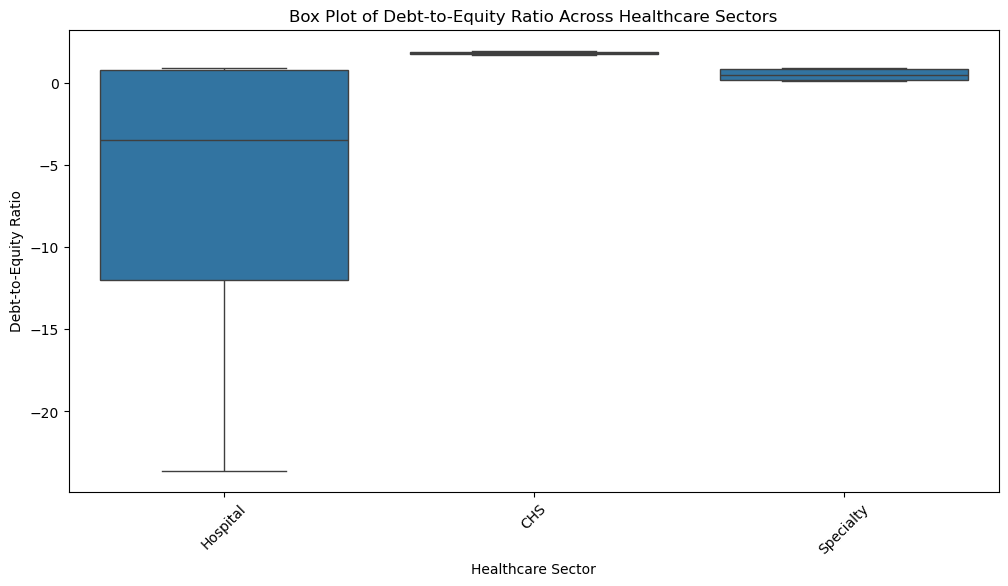

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Debt-to-Equity Ratio', data=df_fp)
plt.title('Box Plot of Debt-to-Equity Ratio Across Healthcare Sectors')
plt.xlabel('Healthcare Sector')
plt.ylabel('Debt-to-Equity Ratio')
plt.xticks(rotation=45)
plt.show()

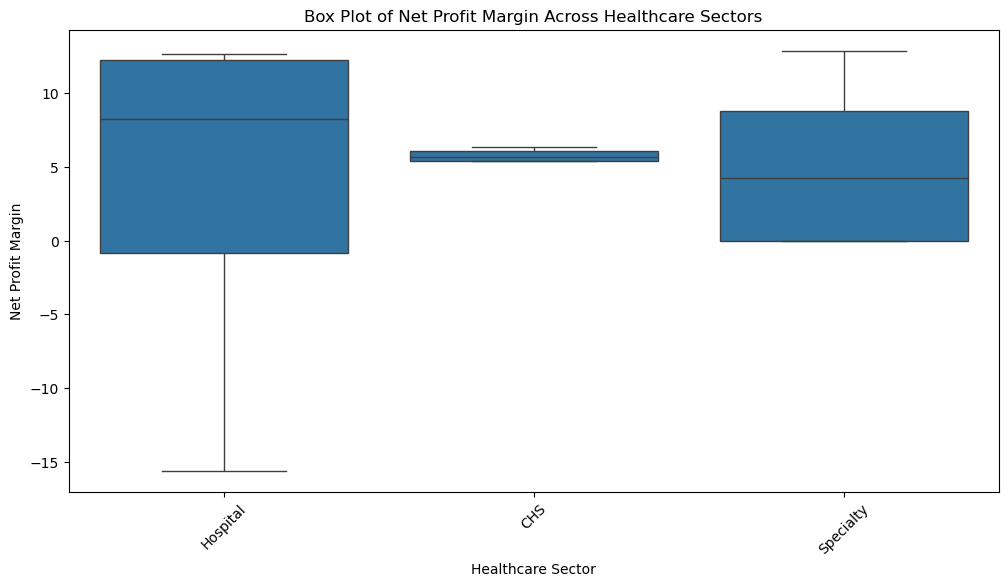

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Net Profit Margin', data=df_fp)
plt.title('Box Plot of Net Profit Margin Across Healthcare Sectors')
plt.xlabel('Healthcare Sector')
plt.ylabel('Net Profit Margin')
plt.xticks(rotation=45)
plt.show()

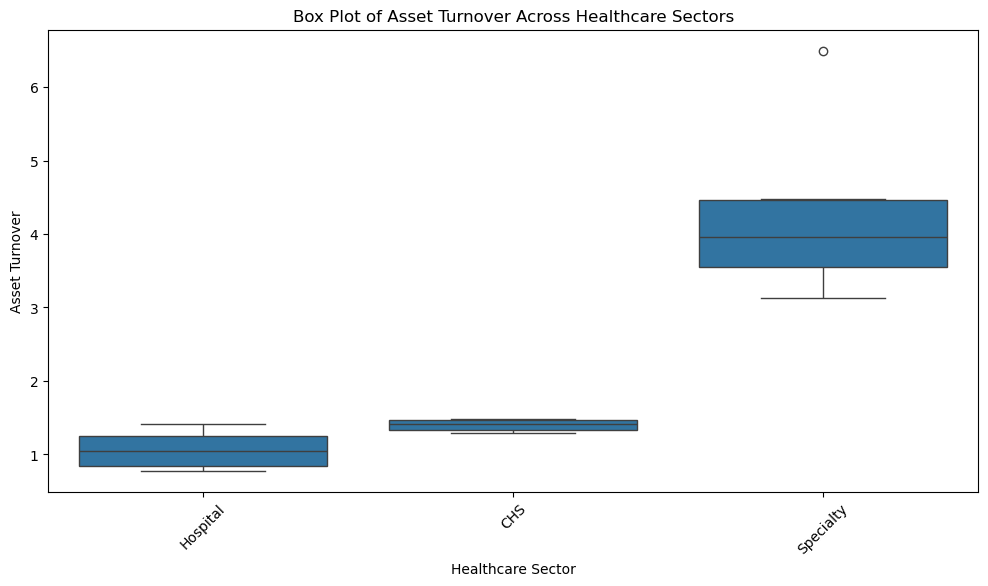

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Asset Turnover', data=df_fp)
plt.title('Box Plot of Asset Turnover Across Healthcare Sectors')
plt.xlabel('Healthcare Sector')
plt.ylabel('Asset Turnover')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Scatter plot example
#plt.figure(figsize=(8, 6))
#sns.scatterplot(x='Financial_Measure_1', y='Financial_Measure_2', hue='Non_Numeric_Column', data=df_non_profit_combined, label='Non-Profit')
#sns.scatterplot(x='Financial_Measure_1', y='Financial_Measure_2', hue='Non_Numeric_Column', data=df_for_profit_combined, label='For-Profit')
#plt.title('Scatter Plot of Financial Measure 1 vs Financial Measure 2')
#plt.xlabel('Financial Measure 1')
#plt.ylabel('Financial Measure 2')
#plt.legend()
#plt.show()

from scipy.stats import pearsonr

# Example of hypothesis testing for a pair of financial measures
corr_non_profit_1_2, p_value_non_profit_1_2 = pearsonr(df_non_profit['Financial_Measure_1'].astype(float), df_non_profit['Financial_Measure_2'].astype(float))
corr_for_profit_1_2, p_value_for_profit_1_2 = pearsonr(df_for_profit['Financial_Measure_1'].astype(float), df_for_profit['Financial_Measure_2'].astype(float))

print(f"Non-Profit: Correlation between Financial Measure 1 and 2: {corr_non_profit_1_2}, p-value: {p_value_non_profit_1_2}")
print(f"For-Profit: Correlation between Financial Measure 1 and 2: {corr_for_profit_1_2}, p-value: {p_value_for_profit_1_2}")

# Interpretation of p-values
significance_level = 0.05
if p_value_non_profit_1_2 < significance_level:
    print("The correlation between Financial Measure 1 and 2 for Non-Profit organizations is statistically significant.")
else:
    print("The correlation between Financial Measure 1 and 2 for Non-Profit organizations is not statistically significant.")

if p_value_for_profit_1_2 < significance_level:
    print("The correlation between Financial Measure 1 and 2 for For-Profit organizations is statistically significant.")
else:
    print("The correlation between Financial Measure 1 and 2 for For-Profit organizations is not statistically significant.")

## Correlation between the datasets

In [28]:
#Find the common key
print(df_np.columns.tolist())

['Organization', 'NP or FP', 'Year', 'Type', 'Contributions and Grants', 'Program Service Revenue', 'Investment Income', 'Other Revenue', 'Total Revenue', 'Salaries & Benefits', 'Other Expenses', 'Total Expenses', 'Revenue less Expenses', 'Total Assets', 'Total Liabilities', 'Net Assets', 'Program Efficiency Ratio', 'Fundraising Efficiency Ratio', 'Operating Reserve Ratio', 'Program Revenue Ratio', 'Revenue Composition Ratio', 'Operating Margin', 'Debt to Asset Ratio', 'Current Ratio', 'Contributions Dependency Ratio']


In [29]:
print(df_fp.columns.tolist())

['Organization', 'NP or FP', 'Type', 'Year', 'Operating Margin', 'Net Profit Margin', 'Current Ratio', 'Debt-to-Equity Ratio', 'Asset Turnover', 'Interest Expense to Revenue']


In [31]:
df_merged = pd.merge(df_np, df_fp, on=['Year', 'Type'], suffixes=('_np', '_fp'))

In [33]:
print("Number of rows in df_np:", df_np.shape[0])
print("Number of rows in df_fp:", df_fp.shape[0])
print("Number of rows in df_merged:", df_merged.shape[0])

Number of rows in df_np: 28
Number of rows in df_fp: 30
Number of rows in df_merged: 28


In [35]:
print(df_merged.columns)

Index(['Organization_np', 'NP or FP_np', 'Year', 'Type',
       'Contributions and Grants', 'Program Service Revenue',
       'Investment Income', 'Other Revenue', 'Total Revenue',
       'Salaries & Benefits', 'Other Expenses', 'Total Expenses',
       'Revenue less Expenses', 'Total Assets', 'Total Liabilities',
       'Net Assets', 'Program Efficiency Ratio',
       'Fundraising Efficiency Ratio', 'Operating Reserve Ratio',
       'Program Revenue Ratio', 'Revenue Composition Ratio',
       'Operating Margin_np', 'Debt to Asset Ratio', 'Current Ratio_np',
       'Contributions Dependency Ratio', 'Organization_fp', 'NP or FP_fp',
       'Operating Margin_fp', 'Net Profit Margin', 'Current Ratio_fp',
       'Debt-to-Equity Ratio', 'Asset Turnover',
       'Interest Expense to Revenue'],
      dtype='object')


In [37]:
#print(df_merged.isnull().sum())

In [39]:
constant_columns = [col for col in df_merged.columns if df_merged[col].nunique() == 1]
print("Constant columns (if any):")
print(constant_columns)

Constant columns (if any):
['NP or FP_np', 'NP or FP_fp']


In [41]:
specific_correlations = df_merged[['Program Efficiency Ratio', 'Fundraising Efficiency Ratio', 'Operating Reserve Ratio', 'Program Revenue Ratio', 'Revenue Composition Ratio', 'Operating Margin_np','Debt to Asset Ratio', 'Current Ratio_np', 'Contributions Dependency Ratio','Operating Margin_fp', 'Net Profit Margin', 'Current Ratio_fp', 'Debt-to-Equity Ratio', 'Asset Turnover','Interest Expense to Revenue']].corr()
print(specific_correlations)

                                Program Efficiency Ratio  \
Program Efficiency Ratio                        1.000000   
Fundraising Efficiency Ratio                   -0.996394   
Operating Reserve Ratio                         0.707833   
Program Revenue Ratio                           1.000000   
Revenue Composition Ratio                      -1.000000   
Operating Margin_np                             0.470171   
Debt to Asset Ratio                            -0.333939   
Current Ratio_np                                0.013487   
Contributions Dependency Ratio                 -0.996394   
Operating Margin_fp                            -0.207408   
Net Profit Margin                              -0.057027   
Current Ratio_fp                                0.353311   
Debt-to-Equity Ratio                           -0.599968   
Asset Turnover                                  0.650433   
Interest Expense to Revenue                    -0.430644   

                                Fundrai

<function matplotlib.pyplot.show(close=None, block=None)>

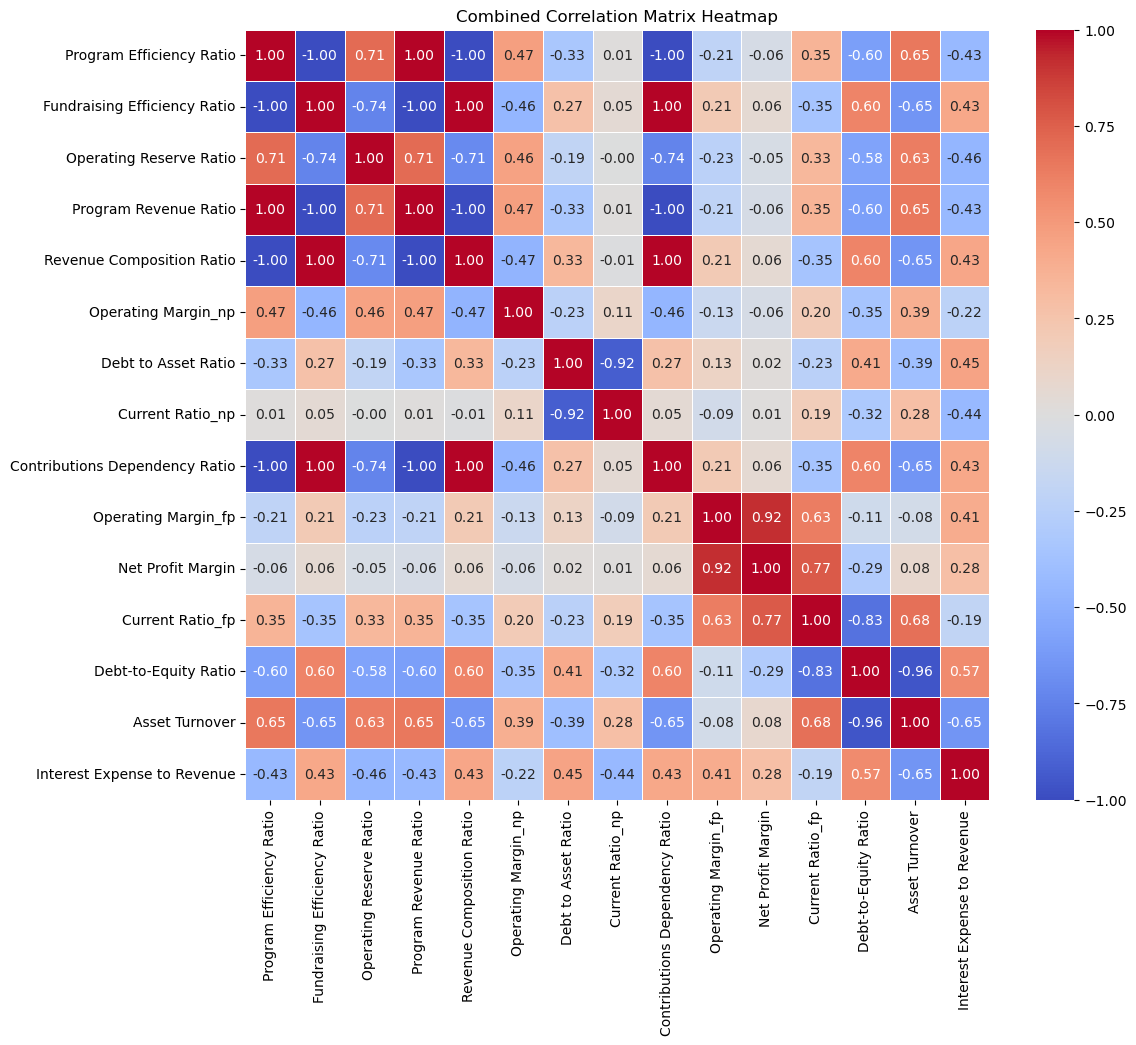

In [43]:
plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(specific_correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Combined Correlation Matrix Heatmap')
plt.show

## Investigate
Operating Margin (Nonprofit) and Operating Margin (For-profit): Understanding how the operating margins of nonprofit and for-profit organizations relate could provide insights into their financial efficiency.

Current Ratio (Nonprofit) and Current Ratio (For-profit): The current ratio measures liquidity. Comparing this across both sectors can reveal how they manage short-term assets and liabilities.

Debt-to-Equity Ratio (For-profit) and Debt to Asset Ratio (Nonprofit): These ratios measure the organizations' leverage. Investigating their correlation might help understand their approach to debt management.

Program Efficiency Ratio (Nonprofit) and Asset Turnover (For-profit): This could show how effectively nonprofits use their resources compared to how for-profits use their assets to generate revenue.

Net Profit Margin (For-profit) and Operating Margin (Nonprofit): Comparing these ratios may reveal how closely related profitability metrics are between the two sectors.

Interest Expense to Revenue (For-profit) and Debt to Asset Ratio (Nonprofit): This can provide insights into how interest expenses impact overall financial stability.

Correlation between Operating Margins (Nonprofit vs For-profit):
                     Operating Margin_np  Operating Margin_fp
Operating Margin_np             1.000000            -0.133217
Operating Margin_fp            -0.133217             1.000000


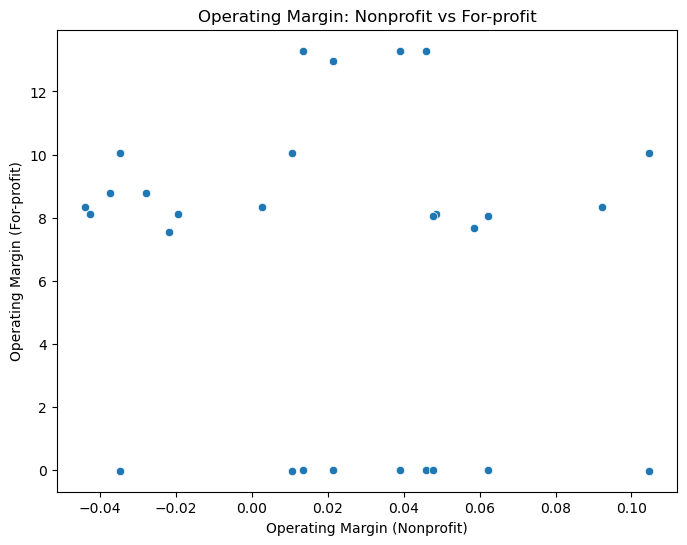

In [46]:
# Calculate the correlation
operating_margin_corr = df_merged[['Operating Margin_np', 'Operating Margin_fp']].corr()
print("Correlation between Operating Margins (Nonprofit vs For-profit):")
print(operating_margin_corr)

# Scatter plot visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_merged, x='Operating Margin_np', y='Operating Margin_fp')
plt.title('Operating Margin: Nonprofit vs For-profit')
plt.xlabel('Operating Margin (Nonprofit)')
plt.ylabel('Operating Margin (For-profit)')
plt.show()

### Observations:

#### Weak Negative Correlation: The correlation coefficient between Operating Margins for nonprofits and for-profits is -0.133217. This indicates a weak negative correlation, suggesting that as the operating margin for nonprofits increases, the operating margin for for-profits slightly tends to decrease, but the relationship is weak.

#### Scatter Plot Pattern: The scatter plot shows points spread out without any strong linear trend, confirming the weak correlation. There isn't a clear upward or downward trend, which aligns with the weak correlation coefficient.

#### Contextual Analysis: Consider the context behind the weak correlation. Explore factors that might cause the differences in operating margins between nonprofit and for-profit organizations.

There could be several contextual reasons behind the weak correlation between Operating Margins for nonprofit and for-profit healthcare organizations. Here are a few possibilities:

1. Different Financial Objectives:
Nonprofits: These organizations often prioritize their mission over profitability. They may reinvest any surplus revenue into their programs, services, or community initiatives.

For-profits: These organizations are driven by profit maximization and shareholder value. Their financial strategies are more focused on generating higher returns on investments.

2. Regulatory and Funding Differences:
Nonprofits: They often rely on grants, donations, and government funding, which can lead to different financial dynamics compared to for-profits. Regulatory requirements and tax exemptions can also impact their financial performance.

For-profits: These entities primarily rely on revenue from services, investments, and other commercial activities. They may have different regulatory and tax considerations.

3. Cost Structures:
Nonprofits: They may have different cost structures, with more emphasis on program-related expenses and less on administrative and marketing costs.

For-profits: These organizations might have higher administrative and operational costs associated with running a profit-driven business.

4. Operational Strategies:
Nonprofits: They might focus on community impact, providing services at lower costs or even free of charge, which can affect their operating margins.

For-profits: Their strategies might involve competitive pricing, market expansion, and efficiency improvements to boost profitability.

5. Market Conditions:
Both types of organizations operate in the same healthcare sector but might respond differently to market conditions, economic fluctuations, and industry trends.

6. Size and Scale:
The size and scale of operations can differ significantly between nonprofit and for-profit organizations, influencing their financial metrics.

Correlation between Current Ratios (Nonprofit vs For-profit):
                  Current Ratio_np  Current Ratio_fp
Current Ratio_np          1.000000          0.186181
Current Ratio_fp          0.186181          1.000000


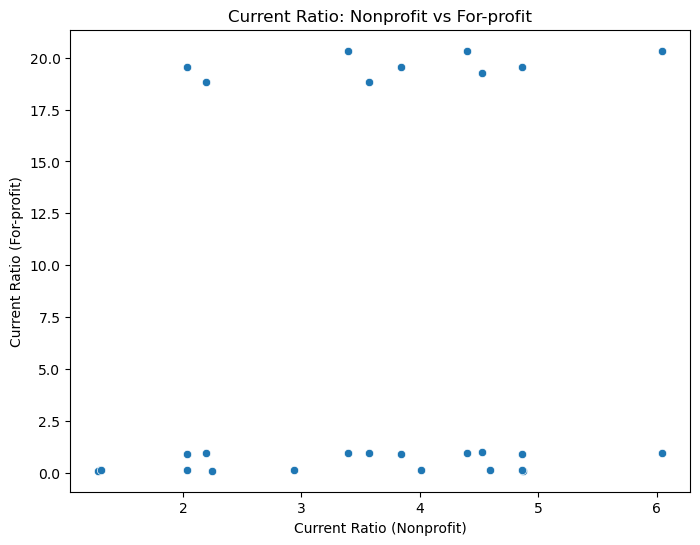

In [49]:
# Calculate the correlation
current_ratio_corr = df_merged[['Current Ratio_np', 'Current Ratio_fp']].corr()
print("Correlation between Current Ratios (Nonprofit vs For-profit):")
print(current_ratio_corr)

# Scatter plot visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_merged, x='Current Ratio_np', y='Current Ratio_fp')
plt.title('Current Ratio: Nonprofit vs For-profit')
plt.xlabel('Current Ratio (Nonprofit)')
plt.ylabel('Current Ratio (For-profit)')
plt.show()

### Observations:

#### Weak Positive Correlation: The correlation coefficient between the current ratios of nonprofit and for-profit organizations is 0.186181. This indicates a weak positive correlation, suggesting that there is a slight tendency for the current ratios to move in the same direction, but the relationship is weak.

#### Scatter Plot Pattern: The scatter plot shows points that are somewhat scattered across the plot, with a slight clustering around certain values. The weak positive correlation is evident as there isn't a strong linear trend, but there is a mild upward pattern.

Nonprofits might have different working capital management practices due to varying funding sources.

For-profits might have different approaches to maintaining liquidity, influenced by their profit-driven strategies.

Correlation between Debt Ratios (Nonprofit vs For-profit):
                      Debt to Asset Ratio  Debt-to-Equity Ratio
Debt to Asset Ratio              1.000000              0.411709
Debt-to-Equity Ratio             0.411709              1.000000


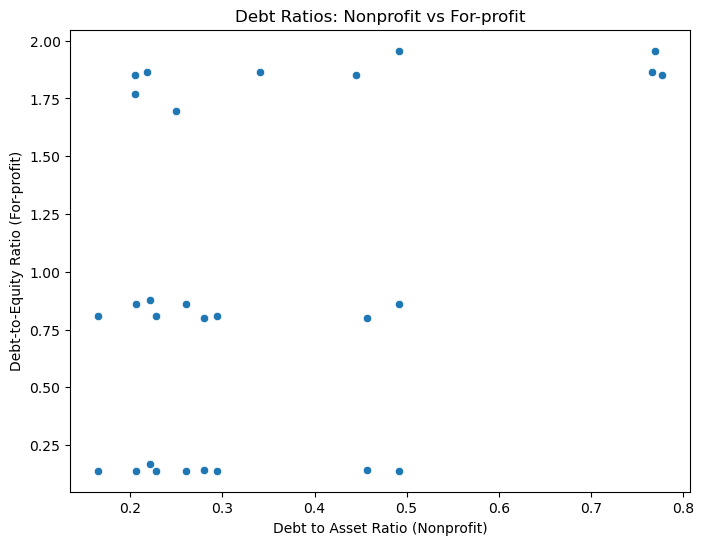

In [52]:
# Calculate the correlation
debt_ratio_corr = df_merged[['Debt to Asset Ratio', 'Debt-to-Equity Ratio']].corr()
print("Correlation between Debt Ratios (Nonprofit vs For-profit):")
print(debt_ratio_corr)

# Scatter plot visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_merged, x='Debt to Asset Ratio', y='Debt-to-Equity Ratio')
plt.title('Debt Ratios: Nonprofit vs For-profit')
plt.xlabel('Debt to Asset Ratio (Nonprofit)')
plt.ylabel('Debt-to-Equity Ratio (For-profit)')
plt.show()

### Observations:

#### Moderate Positive Correlation: The correlation coefficient between the Debt-to-Asset Ratio for nonprofits and the Debt-to-Equity Ratio for for-profits is 0.411709. This indicates a moderate positive correlation, suggesting that as the debt-to-asset ratio for nonprofits increases, the debt-to-equity ratio for for-profits also tends to increase.

#### Scatter Plot Pattern: The scatter plot shows a moderate clustering of points with a generally upward trend, confirming the moderate positive correlation. The relationship between the two ratios is more evident compared to the previous scatter plots.

Contextual Analysis:
Nonprofits may have varying levels of debt due to differences in funding sources and financial strategies.

For-profits may have different approaches to leveraging debt for growth and expansion.

Correlation between Program Efficiency Ratio (Nonprofit) and Asset Turnover (For-profit):
                          Program Efficiency Ratio  Asset Turnover
Program Efficiency Ratio                  1.000000        0.650433
Asset Turnover                            0.650433        1.000000


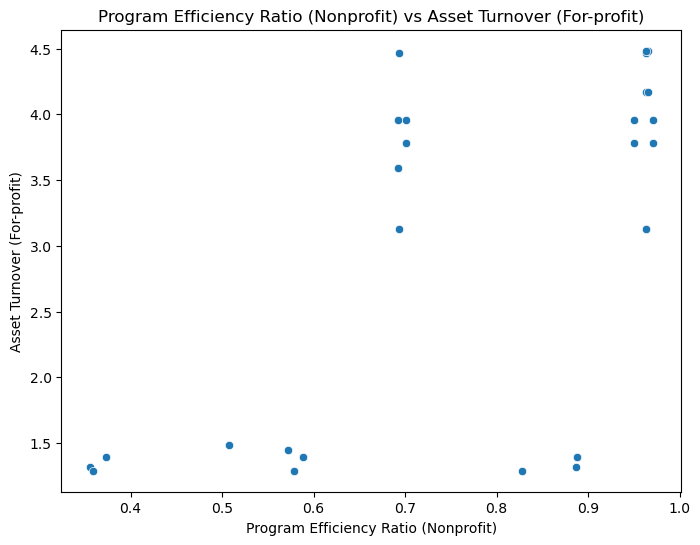

In [55]:
# Calculate the correlation
efficiency_corr = df_merged[['Program Efficiency Ratio', 'Asset Turnover']].corr()
print("Correlation between Program Efficiency Ratio (Nonprofit) and Asset Turnover (For-profit):")
print(efficiency_corr)

# Scatter plot visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_merged, x='Program Efficiency Ratio', y='Asset Turnover')
plt.title('Program Efficiency Ratio (Nonprofit) vs Asset Turnover (For-profit)')
plt.xlabel('Program Efficiency Ratio (Nonprofit)')
plt.ylabel('Asset Turnover (For-profit)')
plt.show()

### Observations:

#### Moderate to Strong Positive Correlation: The correlation coefficient between the Program Efficiency Ratio for nonprofits and the Asset Turnover for for-profits is 0.650433. This indicates a moderate to strong positive correlation, suggesting that as the program efficiency ratio for nonprofits increases, the asset turnover for for-profits also tends to increase.

#### Scatter Plot Pattern: The scatter plot shows a clear upward trend, with data points clustering along an upward diagonal. This confirms the positive correlation between these two metrics.

Nonprofits may have varying levels of efficiency due to different program strategies and funding sources.

For-profits may have different approaches to asset utilization for maximizing revenue.

Correlation between Operating Margin (Nonprofit) and Net Profit Margin (For-profit):
                     Operating Margin_np  Net Profit Margin
Operating Margin_np             1.000000          -0.060435
Net Profit Margin              -0.060435           1.000000


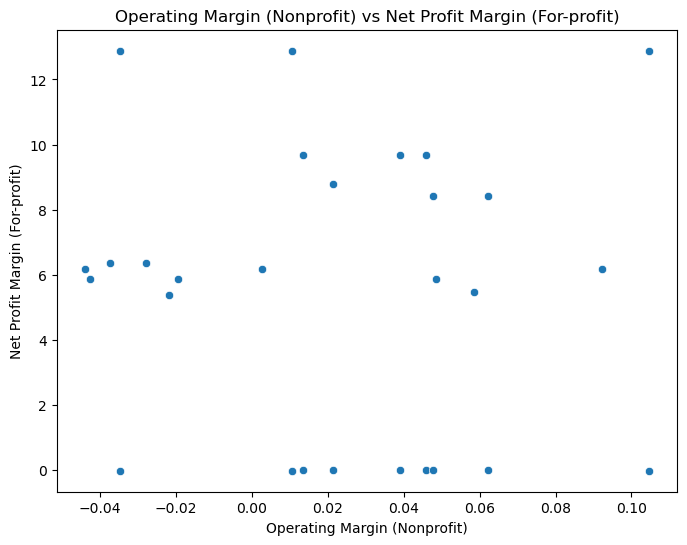

In [58]:
# Calculate the correlation
profit_margin_corr = df_merged[['Operating Margin_np', 'Net Profit Margin']].corr()
print("Correlation between Operating Margin (Nonprofit) and Net Profit Margin (For-profit):")
print(profit_margin_corr)

# Scatter plot visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_merged, x='Operating Margin_np', y='Net Profit Margin')
plt.title('Operating Margin (Nonprofit) vs Net Profit Margin (For-profit)')
plt.xlabel('Operating Margin (Nonprofit)')
plt.ylabel('Net Profit Margin (For-profit)')
plt.show()

### Observations:

#### Very Weak Negative Correlation: The correlation coefficient between Operating Margin for nonprofits and Net Profit Margin for for-profits is -0.060435. This indicates a very weak negative correlation, suggesting that there is little to no relationship between these two variables. As the operating margin for nonprofits increases, the net profit margin for for-profits tends to slightly decrease, but the relationship is negligible.

#### Scatter Plot Pattern: The scatter plot shows points that are widely scattered without any clear trend. This visual representation confirms the very weak correlation, as there is no discernible pattern or linear relationship between the two metrics.

Nonprofits may have different priorities and financial strategies compared to for-profits, leading to diverse financial performance.

External factors, such as funding sources, regulatory environment, and market conditions, may differently influence the financial metrics of nonprofits and for-profits.

Correlation between Debt to Asset Ratio (Nonprofit) and Interest Expense to Revenue (For-profit):
                             Debt to Asset Ratio  Interest Expense to Revenue
Debt to Asset Ratio                      1.00000                      0.44697
Interest Expense to Revenue              0.44697                      1.00000


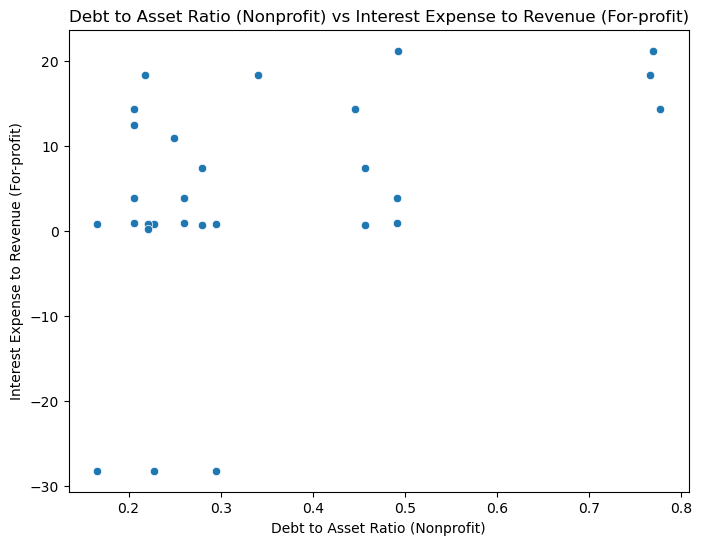

In [61]:
# Calculate the correlation
interest_expense_corr = df_merged[['Debt to Asset Ratio', 'Interest Expense to Revenue']].corr()
print("Correlation between Debt to Asset Ratio (Nonprofit) and Interest Expense to Revenue (For-profit):")
print(interest_expense_corr)

# Scatter plot visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_merged, x='Debt to Asset Ratio', y='Interest Expense to Revenue')
plt.title('Debt to Asset Ratio (Nonprofit) vs Interest Expense to Revenue (For-profit)')
plt.xlabel('Debt to Asset Ratio (Nonprofit)')
plt.ylabel('Interest Expense to Revenue (For-profit)')
plt.show()

### Observations:

#### Moderate Positive Correlation: The correlation coefficient between the Debt to Asset Ratio for nonprofits and the Interest Expense to Revenue for for-profits is 0.44697. This indicates a moderate positive correlation, suggesting that as the debt to asset ratio for nonprofits increases, the interest expense to revenue for for-profits also tends to increase.

#### Scatter Plot Pattern: The scatter plot shows a clustering of points with a generally upward trend, confirming the moderate positive correlation. The relationship between these two variables is visible but not extremely strong.

Nonprofits may have varying levels of debt and corresponding interest expenses due to different funding sources and financial strategies.

For-profits may have different approaches to leveraging debt and managing interest expenses for growth and expansion.

In [72]:
jupyter nbconvert --to pdf ThesisWork.ipynb

SyntaxError: invalid syntax (1813968701.py, line 1)